<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Simple_and_Multivariate_Linear_Regression_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple and Multivariate Linear Regression - Supervised Learning


Prediction of the sale price based on Simple and Multivariate Linear regression with scikit-learn.  
Please visit [sklearn-Linear Models](https://scikit-learn.org/stable/modules/linear_model.html#linear-model) for full details and information.

---

## Objectives


Build simple & mutliple linear regressions for predicting the sale price of house.
* Explore date
* Identify features of interest
* Build model
* Evaluate model
* Improve model
* Make predictions on our own data
* Conclusions
* Bonus : use map for data analysis

## 1. Librairies

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

## 2. Data

Donwload dataset from an URL (github repo).  
KC house dataset : King Country (USA) house dataset , containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. [Kaggle Competition](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [3]:
#link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv"
url = "https://raw.githubusercontent.com/remijul/dataset/master/kc_house_data.csv"
df = pd.read_csv(url)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


First exploration and describing.

In [4]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.160900e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.401174e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671546e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.215000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isna().sum()

id               0
date             0
price            4
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 3. Identify features of interest

This part relates to the selection of features (i.e. variables or columns) that would have a positive impact on the goodness of fit of our prediction model.  
This topic is called feature engineering ([Wikipedia](https://en.wikipedia.org/wiki/Feature_engineering)).  
We are going to exploit the correlation matrix as insights for this kind of selection.  
We could expect features which are the most correlated to the price will have a positive impact on the goodness of fit of our model.

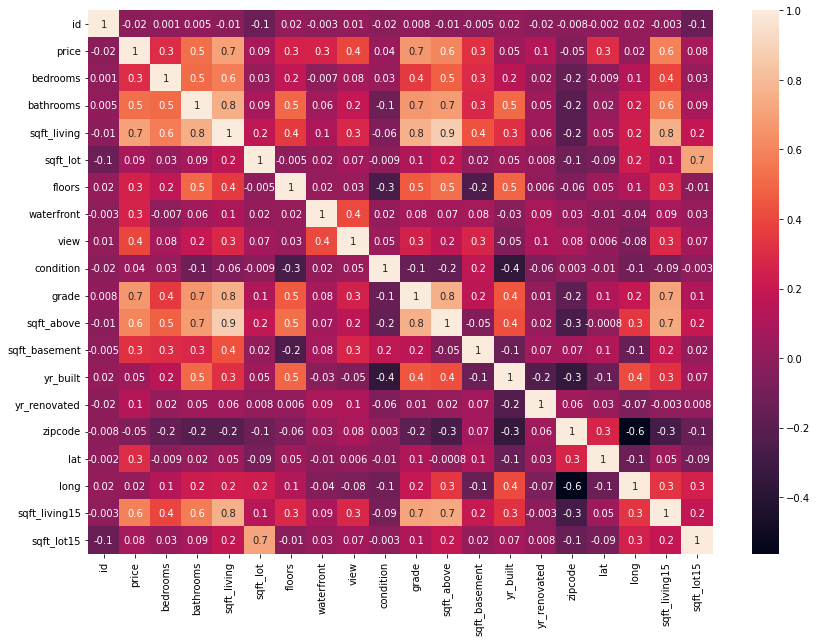

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(data=df.select_dtypes(include=['float64', 'int64']).dropna().corr(), annot=True, fmt='.1g')

In [9]:
df.select_dtypes(include=['float64', 'int64']).dropna().corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016826,0.001092,0.005006,-0.012418,-0.132172,0.018655,-0.002733,0.011553,-0.023871,0.008087,-0.010971,-0.005241,0.021541,-0.016937,-0.008212,-0.001868,0.020848,-0.003091,-0.138878
price,-0.016826,1.000000,0.308330,0.525168,0.702040,0.089639,0.256894,0.266367,0.397280,0.036314,0.667444,0.605574,0.323782,0.054123,0.126420,-0.053150,0.307012,0.021601,0.585372,0.082420
bedrooms,0.001092,0.308330,1.000000,0.515776,0.576602,0.031663,0.175579,-0.006594,0.079504,0.028399,0.356934,0.477528,0.303059,0.154369,0.018817,-0.152595,-0.008891,0.129466,0.391525,0.029191
bathrooms,0.005006,0.525168,0.515776,1.000000,0.754653,0.087711,0.500883,0.063743,0.187732,-0.125080,0.664994,0.685323,0.283748,0.506326,0.050722,-0.203729,0.024630,0.222993,0.568579,0.087138
sqft_living,-0.012418,0.702040,0.576602,0.754653,1.000000,0.172798,0.354114,0.103815,0.284597,-0.058834,0.762715,0.876590,0.435012,0.318266,0.055342,-0.199375,0.052559,0.240229,0.756387,0.183249
sqft_lot,-0.132172,0.089639,0.031663,0.087711,0.172798,1.000000,-0.005149,0.021599,0.074694,-0.008994,0.113614,0.183498,0.015250,0.053160,0.007632,-0.129554,-0.085683,0.229523,0.144567,0.718551
floors,0.018655,0.256894,0.175579,0.500883,0.354114,-0.005149,1.000000,0.023715,0.029499,-0.263690,0.458251,0.524017,-0.245620,0.489212,0.006375,-0.059254,0.049621,0.125491,0.280107,-0.011208
waterfront,-0.002733,0.266367,-0.006594,0.063743,0.103815,0.021599,0.023715,1.000000,0.401856,0.016644,0.082774,0.072072,0.080581,-0.026144,0.092882,0.030300,-0.014274,-0.041918,0.086457,0.030698
view,0.011553,0.397280,0.079504,0.187732,0.284597,0.074694,0.029499,0.401856,1.000000,0.045956,0.251320,0.167639,0.276923,-0.053376,0.103907,0.084878,0.006156,-0.078423,0.280417,0.072556
condition,-0.023871,0.036314,0.028399,-0.125080,-0.058834,-0.008994,-0.263690,0.016644,0.045956,1.000000,-0.144697,-0.158270,0.174042,-0.361336,-0.060645,0.003107,-0.014943,-0.106547,-0.092951,-0.003448


Based on the correlation matrix, features are given below by order of interest :

In [11]:
df.select_dtypes(include=['float64', 'int64']).dropna().corr().iloc[1].sort_values(ascending=False)#[1:].index

price            1.000000
sqft_living      0.702040
grade            0.667444
sqft_above       0.605574
sqft_living15    0.585372
bathrooms        0.525168
view             0.397280
sqft_basement    0.323782
bedrooms         0.308330
lat              0.307012
waterfront       0.266367
floors           0.256894
yr_renovated     0.126420
sqft_lot         0.089639
sqft_lot15       0.082420
yr_built         0.054123
condition        0.036314
long             0.021601
id              -0.016826
zipcode         -0.053150
Name: price, dtype: float64

Let's plot a 3-D representation to show how price may be correlated to multiple features.

In [12]:
import plotly.express as px
fig = px.scatter_3d(df, x="sqft_living", y="sqft_above", z="price", hover_name="id", color="grade", width=800, height=800)
fig.show()

So let's imagine that a multivariate linear regression allows to build a multiplan analysis, not only 2-D or 3-D but in Multi-D 😲 ...

## 4. Build a 1-D model : simple linear regression

We are going to build a first model with the most interesting feature : `sqft_living`.  
But before, split the whole data into two sub datasets : train & test.

In [13]:
from sklearn.model_selection import train_test_split
y = df.dropna()['price']
X = df.dropna()[['sqft_living']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 21609
The length of the train dataset is   : 16206
The length of the test dataset is    : 5403


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.4916261193762217

## 5. Evaluate model

The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model and the values observed. [Wikipedia](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

In [15]:
from sklearn.metrics import mean_squared_error
prediction = model.predict(X_test)
mean_squared_error(y_test, prediction)
print("The RMSE is pretty poor :", round(np.sqrt(mean_squared_error(y_test, prediction)), 2))

The RMSE is pretty poor : 271128.86


:( 

## 6. Build a 2-D model : multiple linear regression

We are going to build a first model with the 2 most interesting features : 'sqft_living' & 'grade'.  
But before, split the whole data into two sub datasets : train & test.

In [16]:
from sklearn.model_selection import train_test_split
y = df.dropna()['price']
X = df.dropna()[['sqft_living', 'grade']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 21609
The length of the train dataset is   : 16206
The length of the test dataset is    : 5403


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.5369862958101788

## 7. Evaluate model

The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model and the values observed. [Wikipedia](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

In [18]:
from sklearn.metrics import mean_squared_error
prediction = model.predict(X_test)
mean_squared_error(y_test, prediction)
print("The RMSE is still pretty poor :", round(np.sqrt(mean_squared_error(y_test, prediction)), 2))

The RMSE is still pretty poor : 262533.06


:( 

## 8. Improve model : full multiple linear regression

A more sophisticated multivariate model.  
We are going to use all possible features, step by step, as an attempt for prediction improvement.

In [19]:
columns_of_interest = df.select_dtypes(include=['float64', 'int64']).dropna().corr().iloc[1].sort_values(ascending=False)[1:].index
accuracy = []
rmse = []
feature = []
nb_feature = []

for i, col in enumerate(columns_of_interest):
  columns_to_select = columns_of_interest[:i+1]
  y = df.dropna()['price']
  X = df.dropna()[columns_to_select]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  accuracy.append(model.score(X_train, y_train))
  rmse.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
  feature.append(columns_to_select)
  nb_feature.append(i+1)

In [20]:
df_model = pd.DataFrame(data= {'nb_feature': nb_feature, 'feature': feature, 'accuracy': accuracy, 'rmse': rmse})
df_model

,nb_feature,feature,accuracy,rmse
0,1,"Index(['sqft_living'], dtype='object')",0.491626,271128.863004
1,2,"Index(['sqft_living', 'grade'], dtype='object')",0.536986,262533.062052
2,3,"Index(['sqft_living', 'grade', 'sqft_above'], ...",0.543848,260950.358251
3,4,"Index(['sqft_living', 'grade', 'sqft_above', '...",0.545093,260979.135385
4,5,"Index(['sqft_living', 'grade', 'sqft_above', '...",0.547186,260238.163498
5,6,"Index(['sqft_living', 'grade', 'sqft_above', '...",0.577125,249759.444152
6,7,"Index(['sqft_living', 'grade', 'sqft_above', '...",0.577125,249759.444152
7,8,"Index(['sqft_living', 'grade', 'sqft_above', '...",0.581089,248503.338242
8,9,"Index(['sqft_living', 'grade', 'sqft_above', '...",0.640617,229950.908010
9,10,"Index(['sqft_living', 'grade', 'sqft_above', '...",0.658076,225197.217503


Let's draw the data for a better analysis ...

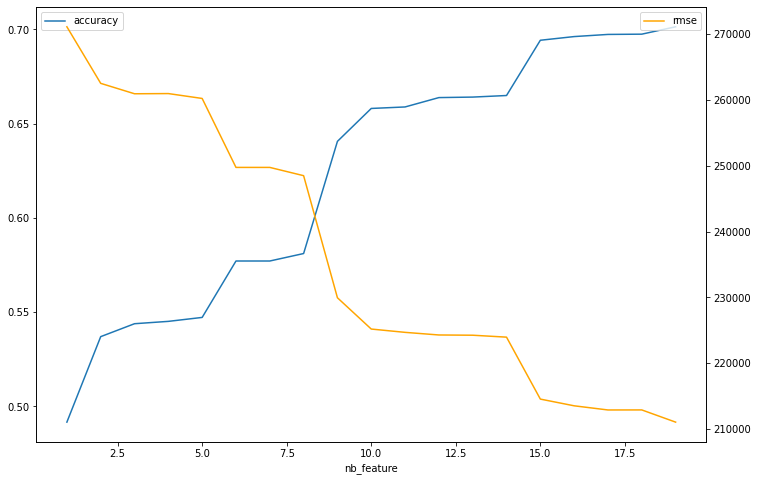

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax2 = ax.twinx()
df_model.plot(x='nb_feature', y='accuracy', ax=ax)
df_model.plot(x='nb_feature', y='rmse', ax=ax2, color="orange")

Our approach is based on a balance RMSE & Complexity of the model (i.e. additional features without real interest). So let's choose the model with 9 features ...  
More sophisticated approach are possible and convenient, sush as the BIC / AIC criterion to identify the most useful features.  
* [BIC](https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_bay%C3%A9sien)
* [AIC](https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike)

## 9. Make predictions on our own data

We would like to predict the sale price of our own house.

In [22]:
# The 9 selected features
my_features = df_model.loc[df_model['nb_feature'] == 9, 'feature'].values.all()
my_features

Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')

In [23]:
# A developper
df_model.loc[df_model['nb_feature'] == 9, 'feature'].values.all()

Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')

In [24]:
# Model with these 9 features
y = df.dropna()['price']
X = df.dropna()[my_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
my_model = LinearRegression()
my_model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Prediction for our house
my_house = pd.DataFrame(data= {'sqft_living':1200,
                               'grade':10,
                               'sqft_above':1080,
                               'sqft_living15':1750,
                               'bathrooms':2,
                               'view':0,
                               'sqft_basement':400,
                               'bedrooms':3,
                               'lat':47.58
                               }, index=[0])
my_price = my_model.predict(my_house)
print("Dear customer, we are sincerely greatful of your trust towards our real estate services.\nFrom provided information the sale price of your house is estimated at", np.around(my_price, decimals=2), "USD.")

Dear customer, we are sincerely greatful of your trust towards our real estate services.
From provided information the sale price of your house is estimated at [581905.21] USD.


## 10. Conclusions

* The Multiple linear regression is an easy-to-use machine learning algorithm.
* Based on our dataset, performances of our model are not good enough to predict sale prices with satisfying confidence.
* Our model could be certainly improved with :
  - More preprocessing
  - Standardisation of features
  - More advanced feature engineering : geographical areas, date effect, etc.
* Other models could provide more accurate predictions
* This [Kaggle notebook](https://www.kaggle.com/madislemsalu/predicting-housing-prices-in-king-county-usa/notebook) provides lot of useful and fruitful insights on other algorithms for this dataset.

## Bonus : Map

Drawing data on a map could be provide other insights such as local areas very expensive, and leads to improve our prediction.

In [26]:
import plotly.express as px
fig = px.density_mapbox(df, lat='lat', lon='long', z='price', radius=15,
                        center=dict(lat=df['lat'].mean(), lon=df['long'].mean()), zoom=9,
                        mapbox_style="carto-positron", width=1000, height=750,
                        hover_name="id", hover_data=my_features)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## More ressources

https://www.youtube.com/watch?v=cpltYCNLIt0

https://www.kaggle.com/madislemsalu/predicting-housing-prices-in-king-county-usa/notebook

https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f

https://www.kaggle.com/harlfoxem/house-price-prediction-part-2

https://www.kaggle.com/vanshjatana/applied-machine-learning
